In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt
from datetime import timezone, timedelta

In [2]:
timezone_offset = -5.0  # Eastern Standard Time (UTC−08:00)
tzinfo = timezone(timedelta(hours=timezone_offset))
current_dateTime = datetime.now(tzinfo)

In [3]:
begin_date = '2024-08-12T00:00:00.000-05:00'
#end_date = '2024-08-14T11:00:00.000-05:00'
end_date = current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z')


In [4]:
print(end_date)

2024-10-28T08:36:20.473969-0500


In [5]:
print(current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z'))

2024-10-28T08:36:20.473969-0500


In [6]:
#print(end_date)

In [7]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)

print (pompton_plains)

pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

     agency_cd   site_no          datetime tz_cd 194446_00065 194446_00065_cd
0           5s       15s               20d    6s          14n             10s
1         USGS  01388500  2024-08-12 01:00   EDT         9.47               P
2         USGS  01388500  2024-08-12 01:15   EDT         9.47               P
3         USGS  01388500  2024-08-12 01:30   EDT         9.46               P
4         USGS  01388500  2024-08-12 01:45   EDT         9.46               P
...        ...       ...               ...   ...          ...             ...
7422      USGS  01388500  2024-10-28 08:15   EDT         7.72               P
7423      USGS  01388500  2024-10-28 08:30   EDT         7.72               P
7424      USGS  01388500  2024-10-28 08:45   EDT         7.72               P
7425      USGS  01388500  2024-10-28 09:00   EDT         7.72               P
7426      USGS  01388500  2024-10-28 09:15   EDT         7.72               P

[7427 rows x 6 columns]


,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage


In [8]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2024-08-12 01:00,2.30,riverdale_gage
2024-08-12 01:15,2.30,riverdale_gage
2024-08-12 01:30,2.30,riverdale_gage
2024-08-12 01:45,2.29,riverdale_gage
2024-08-12 02:00,2.29,riverdale_gage


In [9]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2024-08-12 01:00,EDT,8.14,P
2,USGS,01388000,2024-08-12 01:05,EDT,8.14,P
3,USGS,01388000,2024-08-12 01:10,EDT,8.13,P
4,USGS,01388000,2024-08-12 01:15,EDT,8.13,P
5,USGS,01388000,2024-08-12 01:20,EDT,8.13,P
...,...,...,...,...,...,...
22231,USGS,01388000,2024-10-28 08:55,EDT,6.49,P
22232,USGS,01388000,2024-10-28 09:00,EDT,6.49,P
22233,USGS,01388000,2024-10-28 09:05,EDT,6.50,P
22234,USGS,01388000,2024-10-28 09:10,EDT,6.50,P


In [10]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2024-08-12 01:00,8.14,ramapo_gage
2024-08-12 01:05,8.14,ramapo_gage
2024-08-12 01:10,8.13,ramapo_gage
2024-08-12 01:15,8.13,ramapo_gage
2024-08-12 01:20,8.13,ramapo_gage


In [11]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,pompton_precip
2024-08-12 01:15,0.0,pompton_precip
2024-08-12 01:30,0.0,pompton_precip
2024-08-12 01:45,0.0,pompton_precip
2024-08-12 02:00,0.0,pompton_precip


In [12]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,ramapo_precip
2024-08-12 01:15,0.0,ramapo_precip
2024-08-12 01:30,0.0,ramapo_precip
2024-08-12 01:45,0.0,ramapo_precip
2024-08-12 02:00,0.0,ramapo_precip


In [13]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [14]:
merge

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage
...,...,...
2024-10-28 08:00,0.00,ramapo_precip
2024-10-28 08:15,0.00,ramapo_precip
2024-10-28 08:30,0.00,ramapo_precip


In [15]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2024-08-12 01:00,9.47,pompton_gage
1,2024-08-12 01:15,9.47,pompton_gage
2,2024-08-12 01:30,9.46,pompton_gage
3,2024-08-12 01:45,9.46,pompton_gage
4,2024-08-12 02:00,9.45,pompton_gage
...,...,...,...
51896,2024-10-28 08:00,0.00,ramapo_precip
51897,2024-10-28 08:15,0.00,ramapo_precip
51898,2024-10-28 08:30,0.00,ramapo_precip
51899,2024-10-28 08:45,0.00,ramapo_precip


In [16]:
test_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
test_data = test_data.convert_frequency(freq='H', agg_numeric="max")
test_data.head()

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


series
item_id      timestamp                  
pompton_gage 2024-08-12 01:00:00    9.47
             2024-08-12 02:00:00    9.45
             2024-08-12 03:00:00    9.43
             2024-08-12 04:00:00    9.41
             2024-08-12 05:00:00    9.39

In [17]:
predictor = TimeSeriesPredictor.load('models/pompton_gage_autogluon_6', require_version_match=False)

In [18]:
predictions = predictor.predict(test_data)

In [19]:
predictions

mean       0.1       0.2       0.3  \
item_id        timestamp                                                     
pompton_gage   2024-10-28 10:00:00  7.719697  7.686039  7.696008  7.703354   
               2024-10-28 11:00:00  7.719397  7.668736  7.684574  7.696302   
               2024-10-28 12:00:00  7.719097  7.651477  7.672363  7.685138   
               2024-10-28 13:00:00  7.718797  7.649241  7.662829  7.682264   
               2024-10-28 14:00:00  7.718497  7.640191  7.659846  7.679647   
               2024-10-28 15:00:00  7.718197  7.631145  7.654729  7.677720   
riverdale_gage 2024-10-28 09:00:00  1.759885  1.664402  1.692683  1.713521   
               2024-10-28 10:00:00  1.759772  1.616051  1.660982  1.694254   
               2024-10-28 11:00:00  1.759658  1.567825  1.627076  1.663319   
               2024-10-28 12:00:00  1.759544  1.562218  1.600766  1.655900   
               2024-10-28 13:00:00  1.759431  1.537276  1.593038  1.649208   
               2024-10-28 14:00:00  1.759317  1.512353  1.579253  1.644480   
ramapo_gage    2024-10-28 10:00:00  6.499679  6.481922  6.487181  6.491057   
               2024-10-28 11:00:00  6.499362  6.472633  6.480989  6.487177   
               2024-10-28 12:00:00  6.499044  6.463368  6.474387  6.481127   
               2024-10-28 13:00:00  6.498726  6.462029  6.469198  6.479451   
               2024-10-28 14:00:00  6.498409  6.457094  6.467465  6.477911   
               2024-10-28 15:00:00  6.498091  6.452162  6.464606  6.476735   
pompton_precip 2024-10-28 10:00:00 -0.000006 -0.021266 -0.014969 -0.010329   
               2024-10-28 11:00:00 -0.000008 -0.025255 -0.014654 -0.010796   
               2024-10-28 12:00:00 -0.000009 -0.029829 -0.018809 -0.011798   
               2024-10-28 13:00:00 -0.000011 -0.026266 -0.019907 -0.012843   
               2024-10-28 14:00:00 -0.000013 -0.024338 -0.015937 -0.010248   
               2024-10-28 15:00:00 -0.000015 -0.026223 -0.016956 -0.009724   
ramapo_precip  2024-10-28 10:00:00  0.000018 -0.311000 -0.218881 -0.151003   
               2024-10-28 11:00:00  0.000019 -0.343711 -0.229402 -0.148708   
               2024-10-28 12:00:00  0.000021 -0.385227 -0.236368 -0.148145   
               2024-10-28 13:00:00  0.000023 -0.361866 -0.239569 -0.167537   
               2024-10-28 14:00:00  0.000025 -0.285418 -0.196448 -0.116159   
               2024-10-28 15:00:00  0.000027 -0.306038 -0.191375 -0.103073   

                                         0.4       0.5       0.6       0.7  \
item_id        timestamp                                                     
pompton_gage   2024-10-28 10:00:00  7.713252  7.721184  7.729698  7.737278   
               2024-10-28 11:00:00  7.707092  7.716912  7.725451  7.737495   
               2024-10-28 12:00:00  7.701834  7.713724  7.729045  7.741994   
               2024-10-28 13:00:00  7.693205  7.703743  7.721403  7.740686   
               2024-10-28 14:00:00  7.694465  7.708879  7.725747  7.745660   
               2024-10-28 15:00:00  7.695974  7.719150  7.733647  7.750243   
riverdale_gage 2024-10-28 09:00:00  1.741601  1.764102  1.788256  1.809762   
               2024-10-28 10:00:00  1.724862  1.752722  1.776947  1.811112   
               2024-10-28 11:00:00  1.710681  1.744414  1.787875  1.824613   
               2024-10-28 12:00:00  1.686938  1.716833  1.766934  1.821635   
               2024-10-28 13:00:00  1.691246  1.732138  1.779990  1.836482   
               2024-10-28 14:00:00  1.696266  1.762011  1.803136  1.850220   
ramapo_gage    2024-10-28 10:00:00  6.496279  6.500463  6.504955  6.508955   
               2024-10-28 11:00:00  6.492869  6.498050  6.502556  6.508910   
               2024-10-28 12:00:00  6.489935  6.496209  6.504291  6.511124   
               2024-10-28 13:00:00  6.485224  6.490783  6.500101  6.510273   
               2024-10-28 14:00:00  6.485728  6.493334  6.502233  6.512739   
               2024-10-28 15:00:00  6.486366  6.498593  6.506

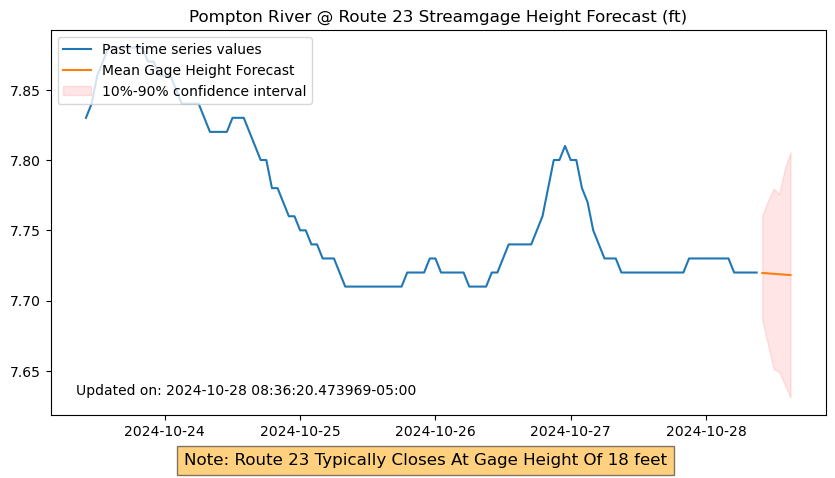

In [20]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Streamgage Height Forecast (ft)')


y_past = test_data.loc[item_id]
y_pred = predictions.loc[item_id]

plt.plot(y_past[-120:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean Gage Height Forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 18 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.15, 0.15, 'Updated on: '+str(current_dateTime), ha='left', fontsize=10)
plt.legend(loc = 'upper left');
plt.savefig('pompton-gage-forecast.png')

In [21]:
print(current_dateTime)

2024-10-28 08:36:20.473969-05:00
